# Support vector machines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

## Large margin classifiers

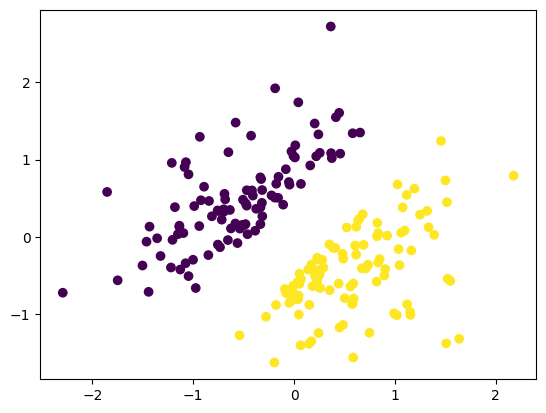

In [2]:
np.random.seed(42)

mean = [0, 0]
cov = 0.5 * np.eye(2, 2)
x = np.random.multivariate_normal(mean=mean, cov=cov, size=300)
x0 = x[x[:, 1] > 1.2 * x[:, 0] + .5]
x1 = x[x[:, 1] < 1.2 * x[:, 0] - .5]
x = np.vstack((x0, x1))

y = np.vstack((np.zeros((x0.shape[0], 1)), np.ones((x1.shape[0], 1)))).flatten()

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

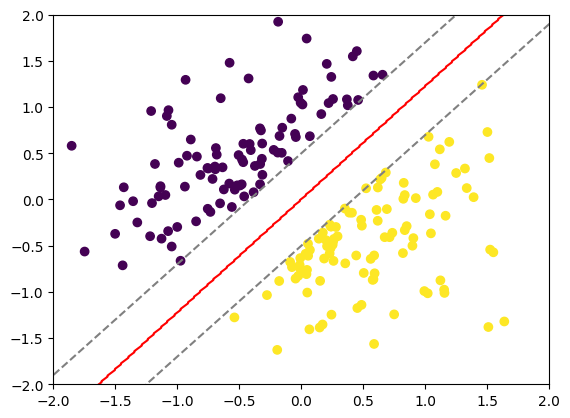

In [3]:
clf = svm.SVC(kernel='linear')
clf.fit(x, y)

p = np.linspace(-3, 3, 500)
q = np.linspace(-3, 3, 500)
P, Q = np.meshgrid(p, q)
PQ = np.hstack((P.flatten().reshape(-1, 1), Q.flatten().reshape(-1, 1)))

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)
ax.contour(P, Q, clf.predict(PQ).reshape(p.size, q.size), levels=[0.5], colors = ["red"])
ax.plot(np.linspace(-3, 3), 1.2 * np.linspace(-3, 3) + .5, '--', color='grey')
ax.plot(np.linspace(-3, 3), 1.2 * np.linspace(-3, 3) - .5, '--', color='grey')
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
plt.show()

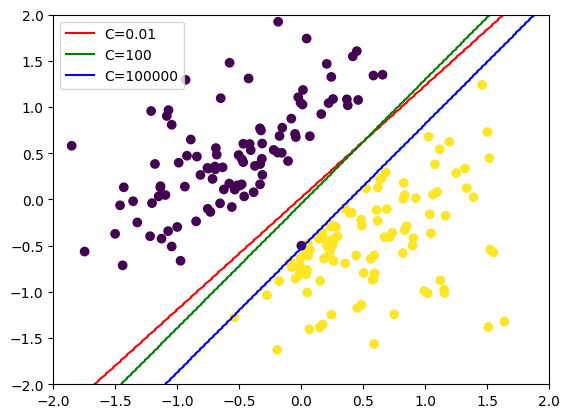

In [4]:
np.random.seed(42)

mean = [0, 0]
cov = 0.5 * np.eye(2, 2)
x = np.random.multivariate_normal(mean=mean, cov=cov, size=300)
x0 = x[x[:, 1] > 1.2 * x[:, 0] + .5]
x1 = x[x[:, 1] < 1.2 * x[:, 0] - .5]
x = np.vstack((x0, x1, [0, -.5]))

y = np.vstack((np.zeros((x0.shape[0], 1)), np.ones((x1.shape[0], 1)), [0])).flatten()

clf = svm.SVC(kernel='linear')

p = np.linspace(-3, 3, 500)
q = np.linspace(-3, 3, 500)
P, Q = np.meshgrid(p, q)
PQ = np.hstack((P.flatten().reshape(-1, 1), Q.flatten().reshape(-1, 1)))

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)

for c, color in zip([0.01, 100, 100_000], ['red', 'green', 'blue']):
    clf.C = c
    clf.fit(x, y)
    ax.contour(P, Q, clf.predict(PQ).reshape(p.size, q.size), levels=[0.5], colors = [color])
    ax.plot([], [], label=rf"C={c}", color=color)

ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

ax.legend()
plt.show()


## SVM with kernel

SVM with kernels allow for solving non-linear classification problems.

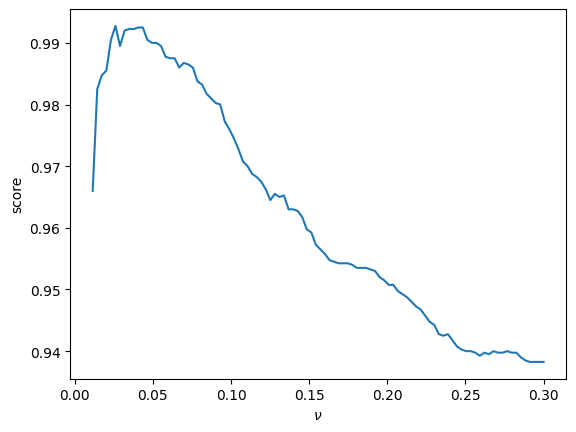

In [5]:
np.random.seed(42)

x = 20 * np.random.rand(4000, 2) - 10
y = np.zeros(x.shape[0])

in_circle = lambda x, x0, r: (x[:, 0] - x0[0]) ** 2 + (x[:, 1]-x0[1]) ** 2 < r ** 2
y[in_circle(x, [-5, 0], 3)] = 1
y[in_circle(x, [2, 0], 2)] = 1
y[in_circle(x, [-1, 3], 3.5)] = 1

clf = svm.NuSVC()

scores = []
for nu in np.linspace(0.0115, 0.3, 100):
    clf.nu = nu
    clf.fit(x, y)
    scores.append([nu, clf.score(x, y)])
scores = np.array(scores)

fig, ax = plt.subplots()
ax.plot(scores[:, 0], scores[:, 1])
ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'score')
plt.show()

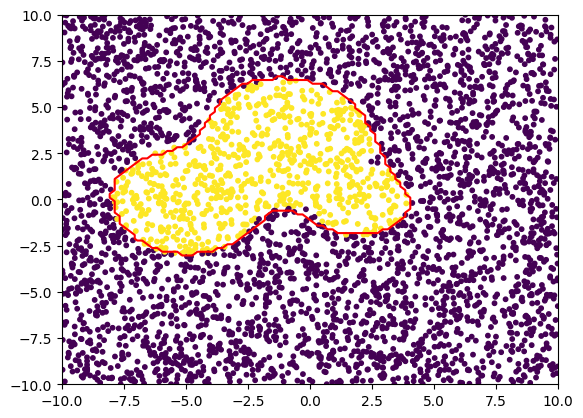

Score: 0.99275, nu: 0.02607070707070707


In [6]:
max = scores[np.argmax(scores[:, 1])]
clf.nu = max[0]
clf.fit(x, y)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y, s=10)

p = np.linspace(-10, 10, 100)
q = np.linspace(-10, 10, 100)
P, Q = np.meshgrid(p, q)
PQ = np.hstack((P.flatten().reshape(-1, 1), Q.flatten().reshape(-1, 1)))
ax.contour(P, Q, clf.predict(PQ).reshape(p.size, q.size), levels=[0.5], colors = ['red'])
plt.show()

print(f"Score: {clf.score(x, y)}, nu: {clf.nu}")